# ***Data Prep***

In [3]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv('Dry_Chili.csv', index_col = 'Date', parse_dates=True)

In [7]:
df

,Price
Date,
2021-06-01,230.0
2021-06-02,230.0
2021-06-03,215.0
2021-06-04,215.0
2021-06-05,215.0
...,...
2022-11-26,425.0
2022-11-27,375.0
2022-11-28,427.5


In [8]:
df.dropna()

,Price
Date,
2021-06-01,230.0
2021-06-02,230.0
2021-06-03,215.0
2021-06-04,215.0
2021-06-05,215.0
...,...
2022-11-26,425.0
2022-11-27,375.0
2022-11-28,427.5


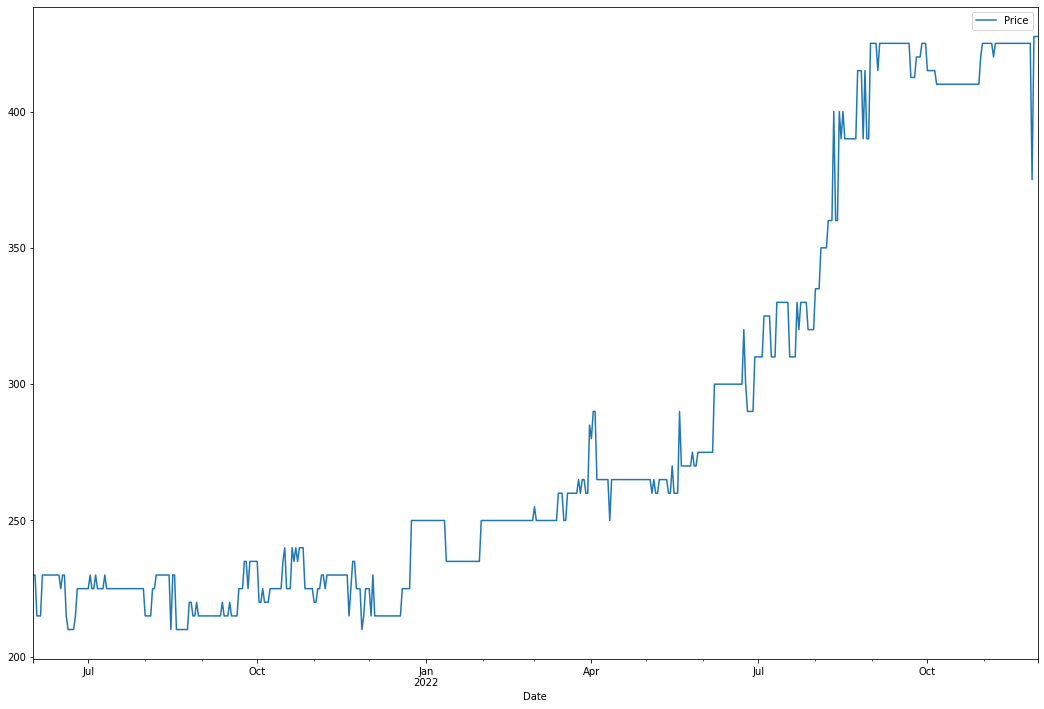

In [9]:
df.plot(figsize = (18, 12));

In [10]:
results = seasonal_decompose(df['Price'], model = 'addtive')

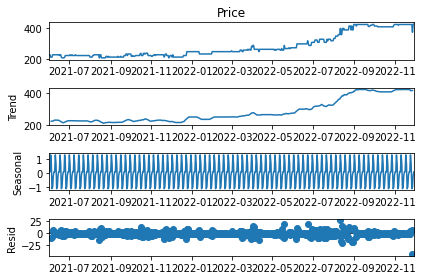

In [11]:
results.plot();

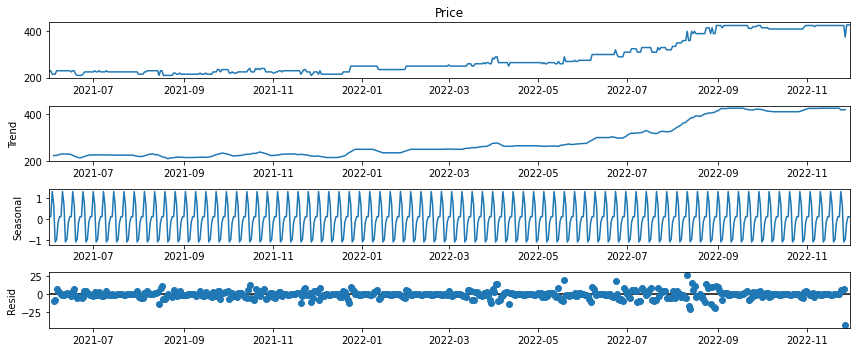

In [12]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

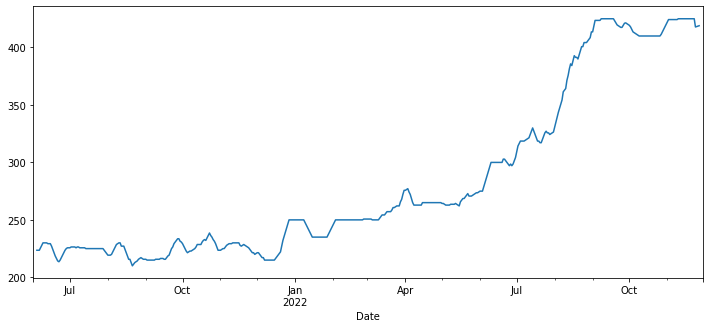

In [13]:
results.trend.plot()

In [14]:
df.index.freq = 'D'

In [15]:
df.head()

,Price
Date,
2021-06-01,230.0
2021-06-02,230.0
2021-06-03,215.0
2021-06-04,215.0
2021-06-05,215.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [17]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [18]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [19]:
test_predictions = fitted_model.forecast(49)

In [20]:
test_predictions

2022-10-14    409.331962
2022-10-15    412.146631
2022-10-16    411.527819
2022-10-17    411.535533
2022-10-18    412.476897
2022-10-19    414.038151
2022-10-20    416.223352
2022-10-21    416.223665
2022-10-22    414.198177
2022-10-23    415.142974
2022-10-24    414.946721
2022-10-25    415.392021
2022-10-26    412.450483
2022-10-27    415.684731
2022-10-28    414.498160
2022-10-29    417.731632
2022-10-30    419.497812
2022-10-31    417.736068
2022-11-01    418.921368
2022-11-02    419.801534
2022-11-03    419.214173
2022-11-04    421.562397
2022-11-05    420.382913
2022-11-06    421.263973
2022-11-07    420.084691
2022-11-08    419.787766
2022-11-09    424.488204
2022-11-10    422.714995
2022-11-11    420.060900
2022-11-12    420.933063
2022-11-13    420.300347
2022-11-14    423.115017
2022-11-15    422.496205
2022-11-16    422.503919
2022-11-17    423.445283
2022-11-18    425.006536
2022-11-19    427.191737
2022-11-20    427.192050
2022-11-21    425.166563
2022-11-22    426.111360


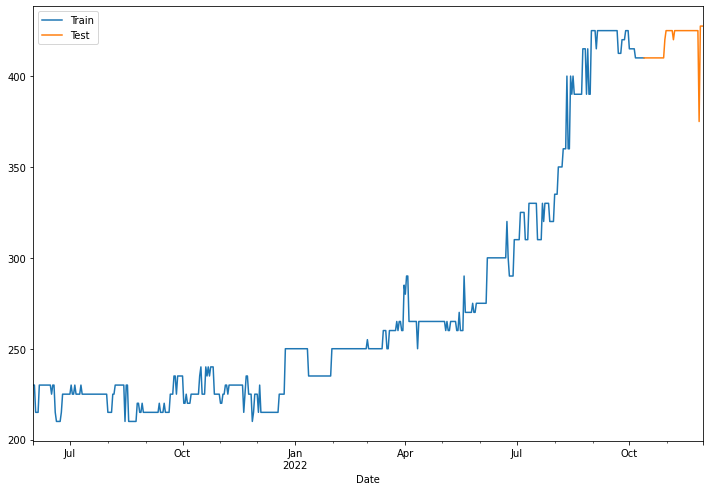

In [21]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [22]:
test_data.describe()

,Price
count,49.000000
mean,418.724490
std,9.643684
min,375.000000
25%,410.000000
50%,425.000000
75%,425.000000
max,427.500000


In [23]:
mean_absolute_error(test_data,test_predictions)


4.2376396380692345

In [24]:
mean_squared_error(test_data, test_predictions)

73.43450037568334

In [25]:
from statsmodels.tools.eval_measures import rmse

In [26]:
rmse(test_data, test_predictions)

array([13.39112582, 11.59184602, 11.95385841, 11.94921583, 11.40767631,
       10.63317639,  9.8670339 ,  9.86695457, 10.5636248 , 10.1946024 ,
       10.26519363, 10.10979776, 11.42216408, 10.01712523, 10.4386076 ,
        9.59627183,  9.57604785,  9.59581385,  9.5468019 ,  9.60534691,
        9.55732466,  9.95772978,  9.68777758,  9.87682342,  9.64120389,
        9.60381287, 11.15002545, 10.34537584,  9.63787621,  9.79696173,
        9.67398536, 10.50615967, 10.26296751, 10.26580499, 10.64840616,
       11.42658196, 12.75919066, 12.75939835, 11.51533654, 12.0693214 ,
       11.95021516, 12.22333427, 10.63672202, 12.40829539, 11.68580272,
       13.80629622, 15.13176681, 13.80950196, 14.68896795])

In [27]:
np.sqrt(mean_squared_error(test_data, test_predictions))

8.569393232643916

In [28]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [29]:
forecast_predictions = final_model.forecast(60)

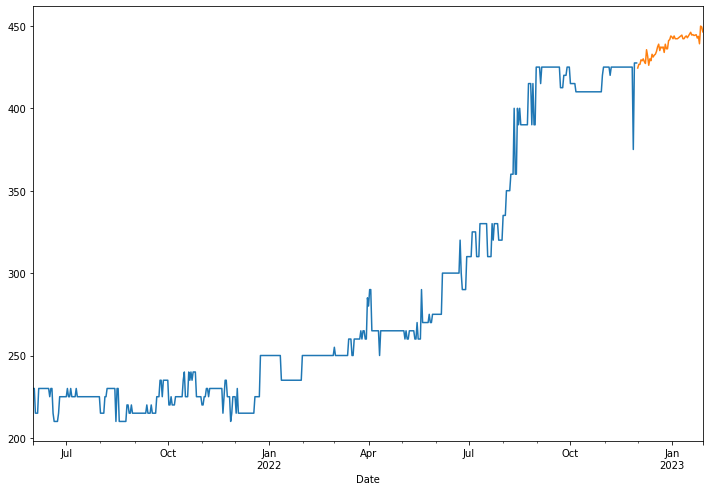

In [30]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [31]:
forecast_predictions

2022-12-01    424.422951
2022-12-02    426.647258
2022-12-03    426.635359
2022-12-04    429.413721
2022-12-05    428.859858
2022-12-06    429.973323
2022-12-07    428.304691
2022-12-08    427.199638
2022-12-09    435.538619
2022-12-10    431.656249
2022-12-11    426.102648
2022-12-12    429.989043
2022-12-13    428.881789
2022-12-14    432.779500
2022-12-15    431.114228
2022-12-16    432.237184
2022-12-17    432.810190
2022-12-18    434.479652
2022-12-19    437.252753
2022-12-20    438.914465
2022-12-21    435.015343
2022-12-22    437.238281
2022-12-23    436.680600
2022-12-24    437.237681
2022-12-25    433.900117
2022-12-26    438.894745
2022-12-27    436.107576
2022-12-28    436.098306
2022-12-29    441.098863
2022-12-30    441.650932
2022-12-31    443.877682
2023-01-01    443.322799
2023-01-02    442.208088
2023-01-03    443.878792
2023-01-04    442.209355
2023-01-05    442.206045
2023-01-06    442.201536
2023-01-07    442.742917
2023-01-08    443.300026
2023-01-09    443.853548


# *SARIMAX*

In [32]:
from datetime import datetime

In [33]:
df_KN = pd.read_csv('Dry_Chili.csv', index_col = 'Date', parse_dates = True)

In [34]:
df_KN.index.freq ='D'

In [35]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [36]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [37]:
adf_test(df_KN['Price'])

ADF Statistics: 0.5973444727006642
p- value: 0.9875499917669194
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [38]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [39]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,230.0,NaN
2021-06-02,230.0,0.0
2021-06-03,215.0,-15.0
2021-06-04,215.0,0.0
2021-06-05,215.0,0.0


In [40]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: 0.5973444727006642
p- value: 0.9875499917669194
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [41]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [42]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -8.86402071598106
p- value: 1.456836456961195e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [43]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [44]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -3.2620815835906876
p- value: 0.01666088211980695
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


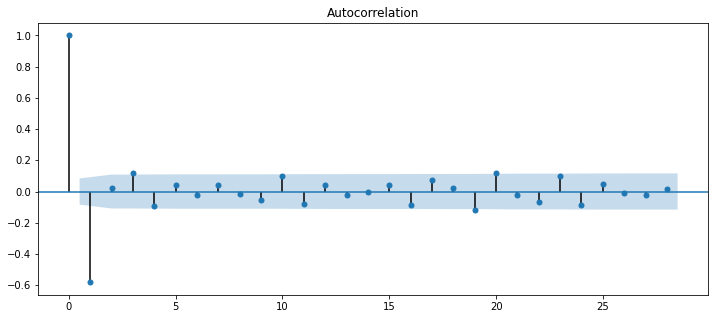

In [45]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

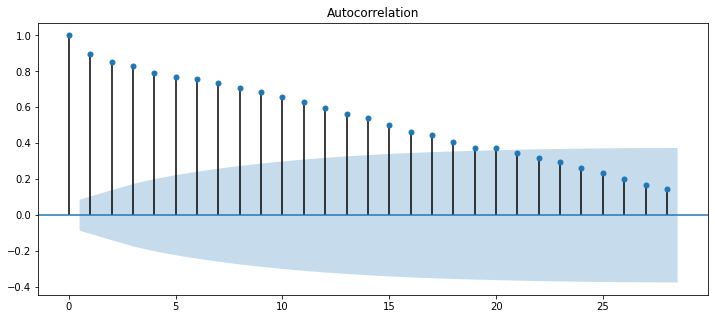

In [46]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

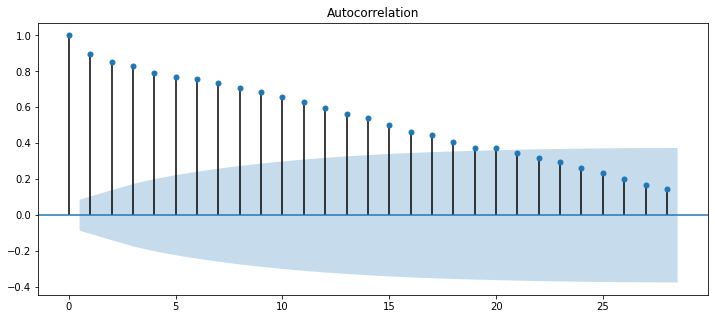

In [47]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

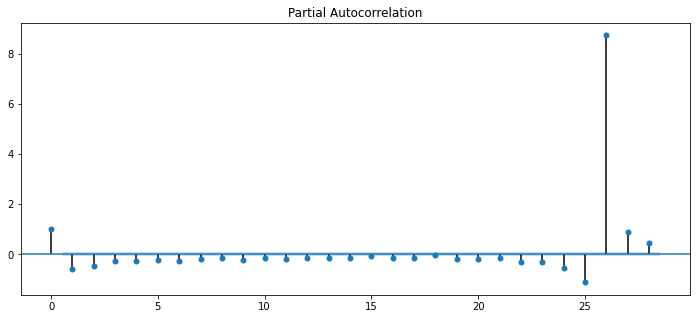

In [48]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [49]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [50]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [51]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [52]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,415.0,0.0,10.0,-10.0
2022-10-03,415.0,0.0,0.0,-10.0
2022-10-04,415.0,0.0,0.0,0.0
2022-10-05,415.0,0.0,0.0,-10.0
2022-10-06,410.0,-5.0,-5.0,-15.0
2022-10-07,410.0,0.0,5.0,-15.0
2022-10-08,410.0,0.0,0.0,-15.0
2022-10-09,410.0,0.0,0.0,-15.0
2022-10-10,410.0,0.0,0.0,-15.0


In [53]:
import statsmodels.api as sm

In [54]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from pmdarima import ARIMA

In [57]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,230.0,NaN,NaN,NaN
2021-06-02,230.0,0.0,NaN,NaN
2021-06-03,215.0,-15.0,-15.0,NaN
2021-06-04,215.0,0.0,15.0,NaN
2021-06-05,215.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,420.0,0.0,0.0,5.0
2022-09-28,425.0,5.0,5.0,35.0
2022-09-29,425.0,0.0,-5.0,35.0


In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [60]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [61]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1668.769
Date:                             Fri, 06 Jan 2023   AIC                           3355.538
Time:                                     23:40:22   BIC                           3392.679
Sample:                                 06-01-2021   HQIC                          3370.166
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1516      0.030     37.773      0.000       1.092       1.211
ar.L2         -1.0505      0.044    -24.108      0.000      -1.136      -0.965
ar.L3          0.8818      0.032     27.358      0.000       0.819       0.945
ma.L1         -0.5179      0.053     -9.764      0.000      -0.622      -0.414
ma.L2          0.8772      0.072     12.169      0.000       0.736       1.018
ma.L3         -0.2669      0.052     -5.153      0.000      -0.368      -0.165
ma.L4         -0.1867      0.046     -4.078      0.000      -0.276      -0.097
ma.L5          0.0165      0.038      0.428      0.669      -0.059       0.092
sigma2        85.8047      5.889     14.571      0.000      74.263      97.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                95.98
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [63]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

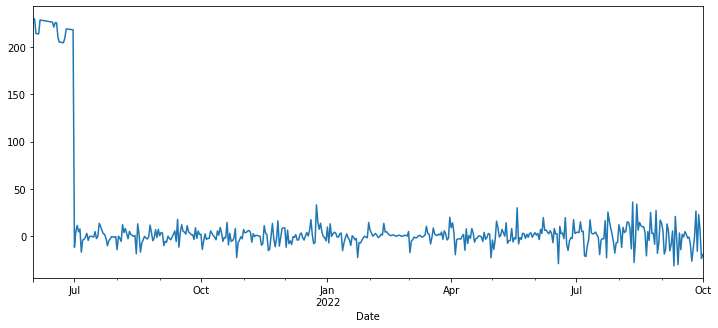

In [64]:
model_SARIMAX_fit.resid.plot()

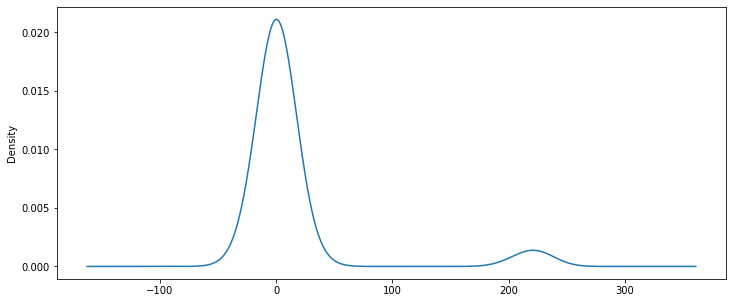

In [65]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [66]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [67]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,415.0,0.0,10.0,-10.0,427.389719
2022-10-03,415.0,0.0,0.0,-10.0,426.744450
2022-10-04,415.0,0.0,0.0,0.0,415.401793
2022-10-05,415.0,0.0,0.0,-10.0,428.970878
2022-10-06,410.0,-5.0,-5.0,-15.0,430.369354
2022-10-07,410.0,0.0,5.0,-15.0,427.366023
2022-10-08,410.0,0.0,0.0,-15.0,425.585742
2022-10-09,410.0,0.0,0.0,-15.0,427.923851
2022-10-10,410.0,0.0,0.0,-15.0,429.838073


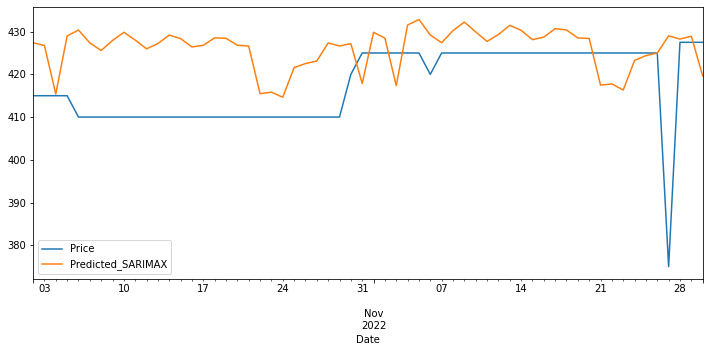

In [68]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [69]:
pred_Sarimax

2022-10-02    427.389719
2022-10-03    426.744450
2022-10-04    415.401793
2022-10-05    428.970878
2022-10-06    430.369354
2022-10-07    427.366023
2022-10-08    425.585742
2022-10-09    427.923851
2022-10-10    429.838073
2022-10-11    428.016332
2022-10-12    425.969422
2022-10-13    427.214035
2022-10-14    429.191087
2022-10-15    428.355290
2022-10-16    426.413472
2022-10-17    426.798780
2022-10-18    428.545327
2022-10-19    428.439461
2022-10-20    426.822585
2022-10-21    426.612027
2022-10-22    415.474724
2022-10-23    415.839330
2022-10-24    414.642012
2022-10-25    421.581878
2022-10-26    422.516151
2022-10-27    423.124609
2022-10-28    427.349891
2022-10-29    426.642445
2022-10-30    427.178175
2022-10-31    417.855099
2022-11-01    429.837707
2022-11-02    428.484942
2022-11-03    417.352163
2022-11-04    431.547153
2022-11-05    432.822030
2022-11-06    429.203932
2022-11-07    427.397494
2022-11-08    430.242299
2022-11-09    432.225369
2022-11-10    429.927562


In [70]:
predicted_value_SARIMA = pred_Sarimax

In [71]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [72]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

10.271271685944194

In [73]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

175.55510360812775

In [74]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

13.24972088793299

# ***FB Prophet***

In [75]:
df_fb  = pd.read_csv('Dry_Chili.csv')

In [76]:
df_fb.columns = ['ds', 'y']

In [77]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [78]:
df_fb.head()

,ds,y
0,2021-06-01,230.0
1,2021-06-02,230.0
2,2021-06-03,215.0
3,2021-06-04,215.0
4,2021-06-05,215.0


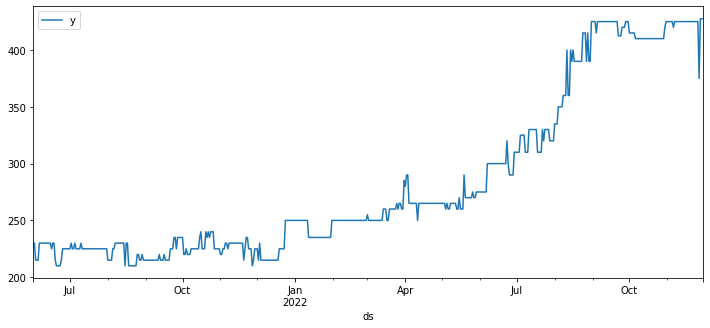

In [79]:
df_fb.plot(x='ds', y='y')

In [80]:
len(df_fb)

548

In [81]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [82]:
import prophet

In [83]:
import io, os, sys, setuptools, tokenize

In [84]:
from fbprophet import Prophet

In [85]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,523.372272,508.073327,536.147729,517.654095,529.049813,-1.460776,-1.460776,-1.460776,-1.460776,-1.460776,-1.460776,0.0,0.0,0.0,521.911497
544,2022-11-27,524.822598,511.272495,537.927005,518.902322,530.674307,-0.336314,-0.336314,-0.336314,-0.336314,-0.336314,-0.336314,0.0,0.0,0.0,524.486284
545,2022-11-28,526.272923,512.432414,540.418959,520.074891,532.230150,-0.202391,-0.202391,-0.202391,-0.202391,-0.202391,-0.202391,0.0,0.0,0.0,526.070532
546,2022-11-29,527.723249,513.364100,543.520679,521.298157,533.874269,0.147893,0.147893,0.147893,0.147893,0.147893,0.147893,0.0,0.0,0.0,527.871142
547,2022-11-30,529.173574,514.840199,544.317409,522.545629,535.528836,0.135602,0.135602,0.135602,0.135602,0.135602,0.135602,0.0,0.0,0.0,529.309176


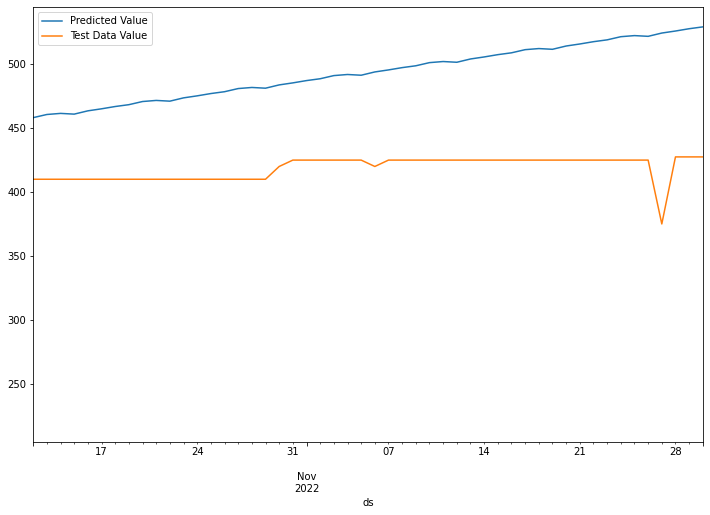

In [87]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [88]:
from statsmodels.tools.eval_measures import rmse

In [89]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [90]:
predictions_fb

488    443.268056
489    444.852304
490    446.652915
491    448.090948
492    450.560411
493    451.417244
494    450.845547
495    453.420334
496    455.004583
497    456.805193
498    458.243227
499    460.712690
500    461.569523
501    460.997826
502    463.572613
503    465.156861
504    466.957471
505    468.395505
506    470.864968
507    471.721801
508    471.150104
509    473.724891
510    475.309140
511    477.109750
512    478.547784
513    481.017247
514    481.874080
515    481.302383
516    483.877170
517    485.461418
518    487.262028
519    488.700062
520    491.169525
521    492.026358
522    491.454661
523    494.029448
524    495.613697
525    497.414307
526    498.852341
527    501.321804
528    502.178637
529    501.606940
530    504.181727
531    505.765975
532    507.566585
533    509.004619
534    511.474082
535    512.330915
536    511.759218
537    514.334005
538    515.918254
539    517.718864
540    519.156898
541    521.626361
542    522.483194
543    521

In [91]:
test_fb

,ds,y
488,2022-10-02,415.0
489,2022-10-03,415.0
490,2022-10-04,415.0
491,2022-10-05,415.0
492,2022-10-06,410.0
493,2022-10-07,410.0
494,2022-10-08,410.0
495,2022-10-09,410.0
496,2022-10-10,410.0
497,2022-10-11,410.0


In [92]:
mean_absolute_error(test_fb['y'], predictions_fb)

68.9263854401688

In [93]:
mean_squared_error(test_fb['y'], predictions_fb)

5220.52953552324

In [94]:
rmse(predictions_fb, test_fb['y'])

72.25323200745584

In [95]:
test_fb.mean()

y    417.458333
dtype: float64

In [96]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [97]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [98]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,331.958428,320.866003,341.534202,335.0,2022-08-02
1,2022-08-04,333.449540,323.280707,343.480198,350.0,2022-08-02
2,2022-08-05,334.445709,324.582081,345.198871,350.0,2022-08-02
3,2022-08-06,333.721504,323.067787,344.330827,350.0,2022-08-02
4,2022-08-07,334.552358,323.575101,345.252299,350.0,2022-08-02


In [100]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,267.881906,16.367098,15.154315,0.043045,0.045475,0.166667
1,7 days,353.212449,18.793947,18.452480,0.052101,0.046899,0.000000
2,8 days,394.054547,19.850807,19.490890,0.054767,0.054895,0.000000
3,9 days,979.805310,31.301842,27.113476,0.072897,0.063349,0.000000
4,10 days,1004.279033,31.690362,27.782666,0.074541,0.063349,0.000000
5,11 days,1038.132388,32.220062,28.711033,0.076915,0.063349,0.000000
6,12 days,1545.450087,39.312213,34.733293,0.090857,0.063349,0.000000
7,13 days,1855.366895,43.073970,39.060330,0.101139,0.094195,0.000000
8,14 days,2321.254206,48.179396,44.858494,0.114580,0.134517,0.000000
9,15 days,2071.543426,45.514211,42.563571,0.109350,0.123478,0.000000


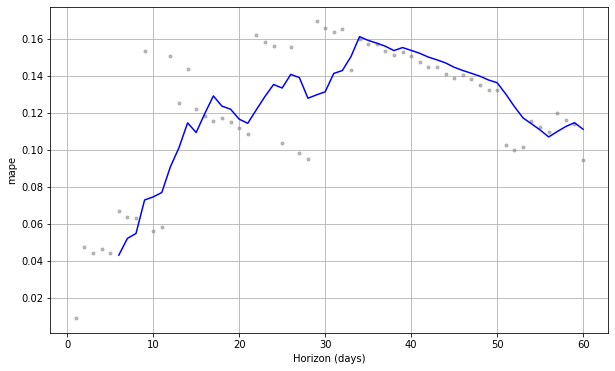

In [101]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [102]:
df_t = pd.read_csv('Dry_Chili.csv')

In [103]:
df_t.columns = ['ds', 'y']

In [104]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [105]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [106]:
t.fit(df_t)

In [107]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

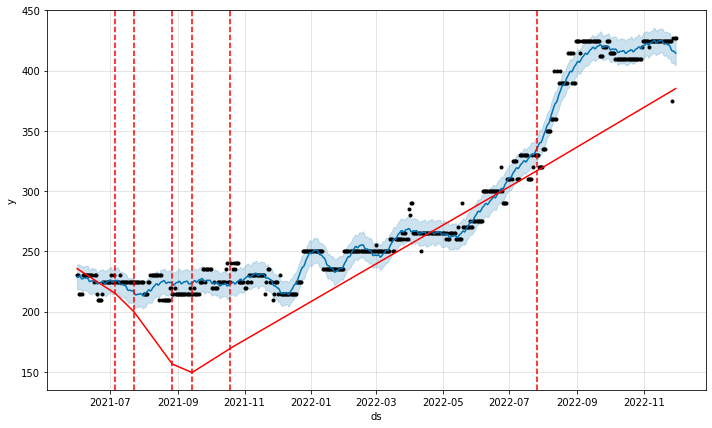

In [108]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [109]:
df_S = pd.read_csv('Dry_Chili.csv')

In [110]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


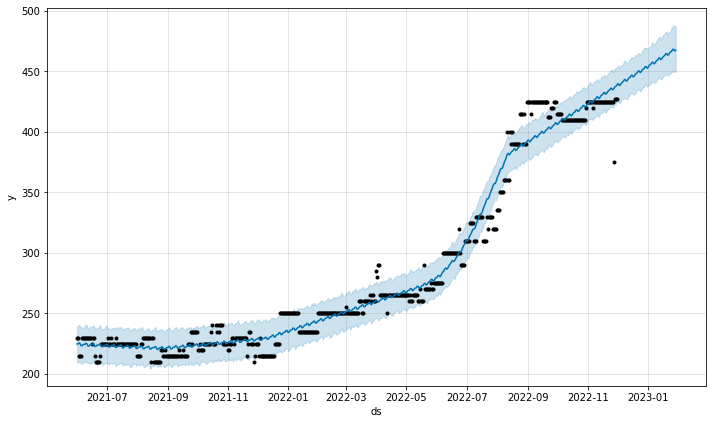

In [111]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

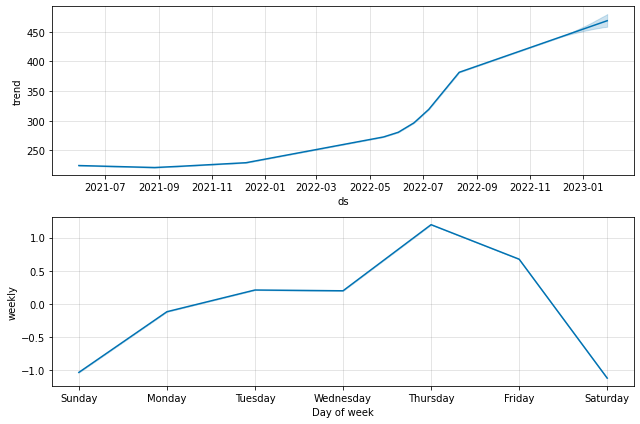

In [112]:
figure = S.plot_components(forecast);

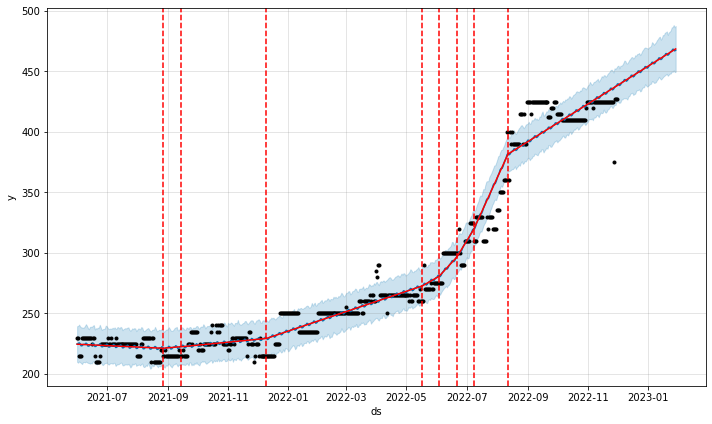

In [113]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


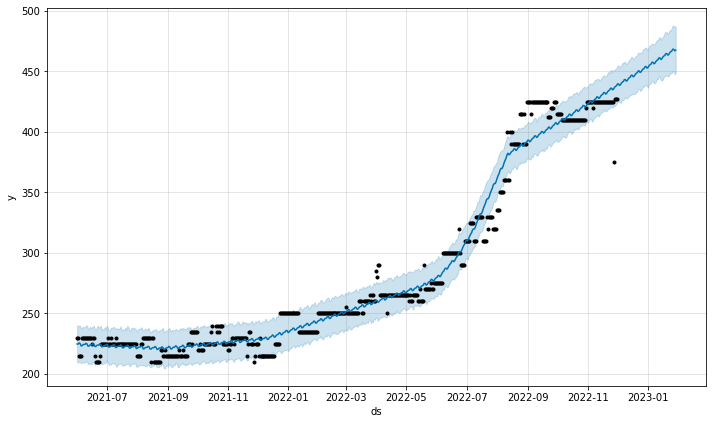

In [114]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

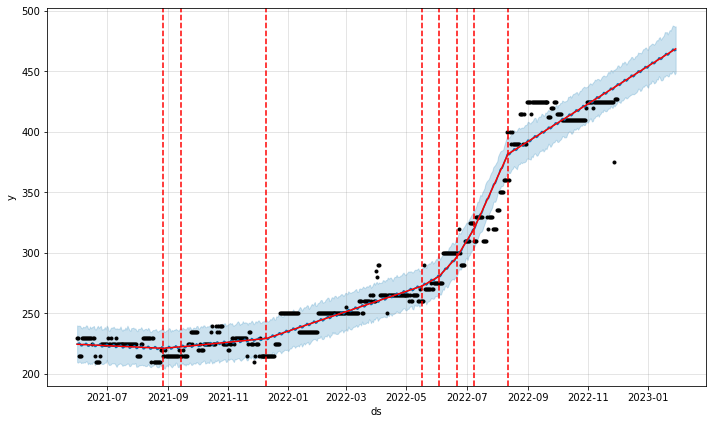

In [115]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

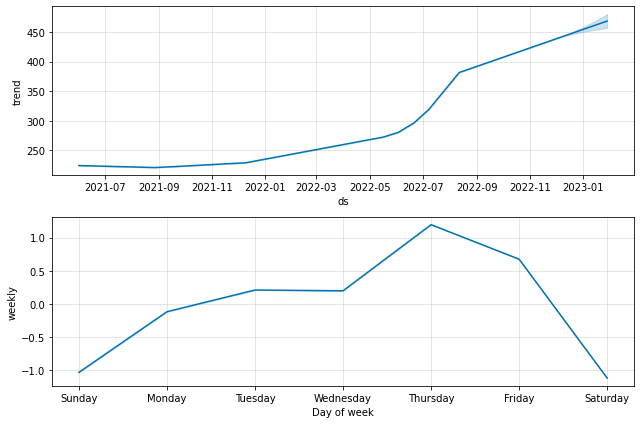

In [116]:
figure = S.plot_components(forecast)

# ***LSTM***

In [117]:
df_LSTM=pd.read_csv("Dry_Chili.csv",parse_dates=["Date"],index_col=[0])

In [118]:
print(df_LSTM.index.freq)

None


In [119]:
test_split=round(len(df_LSTM)*0.20)

In [120]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [121]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [122]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [123]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [124]:
df_for_training_scaled

array([[0.10526316],
       [0.10526316],
       [0.02631579],
       [0.02631579],
       [0.02631579],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.07894737],
       [0.10526316],
       [0.10526316],
       [0.02631579],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02631579],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.10526316],
       [0.07894737],
       [0.07894737],
       [0.10526316],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.10526316],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.078

In [125]:
df_for_training_scaled.shape

(438, 1)

In [126]:
df_for_testing_scaled.shape

(110, 1)

In [127]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [128]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [129]:
trainX.shape

(408, 30, 1)

In [130]:
testX,testY=createXY(df_for_testing_scaled,30)

In [131]:
trainX[0]

array([[0.10526316],
       [0.10526316],
       [0.02631579],
       [0.02631579],
       [0.02631579],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.10526316],
       [0.07894737],
       [0.10526316],
       [0.10526316],
       [0.02631579],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02631579],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737],
       [0.07894737]])

In [132]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [133]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [134]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.10526316]
 [0.10526316]
 [0.02631579]
 [0.02631579]
 [0.02631579]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.10526316]
 [0.07894737]
 [0.10526316]
 [0.10526316]
 [0.02631579]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02631579]
 [0.07894737]
 [0.07894737]
 [0.07894737]
 [0.07894737]
 [0.07894737]
 [0.07894737]]

trainY[0]--  0.07894736842105265


In [135]:
trainY[0]

0.07894736842105265

In [136]:
trainY.shape

(408,)

In [137]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [138]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 5s 102ms/step - loss: 0.0430 - val_loss: 0.0272
Epoch 2/32
13/13 [==============================] - 0s 26ms/step - loss: 0.0089 - val_loss: 0.0160
Epoch 3/32
13/13 [==============================] - 0s 26ms/step - loss: 0.0055 - val_loss: 0.0086
Epoch 4/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 5/32
13/13 [==============================] - 0s 27ms/step - loss: 0.0047 - val_loss: 0.0235
Epoch 6/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0.0239
Epoch 7/32
13/13 [==============================] - 0s 28ms/step - loss: 0.0042 - val_loss: 0.0155
Epoch 8/32
13/13 [==============================] - 0s 26ms/step - loss: 0.0032 - val_loss: 0.0097
Epoch 9/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0039 - val_loss: 0.0238
Epoch 10/32
13/13 [==============================] - 0s 25ms/step - loss: 0.0039 - val_loss: 0.0474
Epoch 11

In [140]:
grid_search.best_params_

{'batch_size': 24, 'epochs': 64, 'optimizer': 'adam'}

In [141]:
my_model=grid_search.best_estimator_.model

In [142]:
my_model

In [143]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 9ms/step


In [144]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.1578634]
 [1.1586858]
 [1.1593513]
 [1.1602476]
 [1.1612217]
 [1.1623574]
 [1.1635284]
 [1.1646864]
 [1.1657935]
 [1.1668216]
 [1.167753 ]
 [1.1519368]
 [1.1353458]
 [1.1224766]
 [1.1240479]
 [1.1300246]
 [1.1363164]
 [1.1482931]
 [1.1589254]
 [1.1663445]
 [1.1574461]
 [1.1457797]
 [1.1355989]
 [1.1282586]
 [1.1235763]
 [1.114417 ]
 [1.1064484]
 [1.1008346]
 [1.0974811]
 [1.0958418]
 [1.095301 ]
 [1.0953431]
 [1.0956007]
 [1.0958474]
 [1.0959673]
 [1.0959208]
 [1.0957142]
 [1.095378 ]
 [1.0949509]
 [1.0944715]
 [1.0939727]
 [1.0935508]
 [1.0931355]
 [1.0927423]
 [1.092339 ]
 [1.0919846]
 [1.091679 ]
 [1.0913917]
 [1.0911547]
 [1.1042138]
 [1.1246369]
 [1.1423513]
 [1.1548002]
 [1.1621692]
 [1.1656754]
 [1.1667197]
 [1.1597332]
 [1.1586753]
 [1.1593463]
 [1.1605744]
 [1.1618564]
 [1.1630111]
 [1.1640078]
 [1.1648731]
 [1.1656444]
 [1.1663518]
 [1.1670139]
 [1.1676377]
 [1.1682243]
 [1.1687703]
 [1.169272 ]
 [1.1697257]
 [1.1701293]
 [1.1704829]
 [1.1707875]
 [1.1710459]


In [145]:
scaler.inverse_transform(prediction)

array([[429.99405],
       [430.1503 ],
       [430.27676],
       [430.44705],
       [430.63214],
       [430.8479 ],
       [431.0704 ],
       [431.29044],
       [431.50076],
       [431.6961 ],
       [431.87308],
       [428.868  ],
       [425.7157 ],
       [423.27057],
       [423.5691 ],
       [424.70465],
       [425.90012],
       [428.1757 ],
       [430.19583],
       [431.60544],
       [429.9148 ],
       [427.69815],
       [425.7638 ],
       [424.3691 ],
       [423.4795 ],
       [421.73923],
       [420.22522],
       [419.1586 ],
       [418.5214 ],
       [418.20993],
       [418.10718],
       [418.1152 ],
       [418.16412],
       [418.21103],
       [418.2338 ],
       [418.22498],
       [418.1857 ],
       [418.12183],
       [418.04068],
       [417.9496 ],
       [417.85483],
       [417.77466],
       [417.69574],
       [417.62103],
       [417.54443],
       [417.47708],
       [417.419  ],
       [417.3644 ],
       [417.3194 ],
       [419.80063],


In [146]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [147]:
prediction_copies_array.shape

(80, 1)

In [148]:
prediction_copies_array

array([[1.1578634],
       [1.1586858],
       [1.1593513],
       [1.1602476],
       [1.1612217],
       [1.1623574],
       [1.1635284],
       [1.1646864],
       [1.1657935],
       [1.1668216],
       [1.167753 ],
       [1.1519368],
       [1.1353458],
       [1.1224766],
       [1.1240479],
       [1.1300246],
       [1.1363164],
       [1.1482931],
       [1.1589254],
       [1.1663445],
       [1.1574461],
       [1.1457797],
       [1.1355989],
       [1.1282586],
       [1.1235763],
       [1.114417 ],
       [1.1064484],
       [1.1008346],
       [1.0974811],
       [1.0958418],
       [1.095301 ],
       [1.0953431],
       [1.0956007],
       [1.0958474],
       [1.0959673],
       [1.0959208],
       [1.0957142],
       [1.095378 ],
       [1.0949509],
       [1.0944715],
       [1.0939727],
       [1.0935508],
       [1.0931355],
       [1.0927423],
       [1.092339 ],
       [1.0919846],
       [1.091679 ],
       [1.0913917],
       [1.0911547],
       [1.1042138],


In [149]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [150]:
pred

array([429.99405, 430.1503 , 430.27676, 430.44705, 430.63214, 430.8479 ,
       431.0704 , 431.29044, 431.50076, 431.6961 , 431.87308, 428.868  ,
       425.7157 , 423.27057, 423.5691 , 424.70465, 425.90012, 428.1757 ,
       430.19583, 431.60544, 429.9148 , 427.69815, 425.7638 , 424.3691 ,
       423.4795 , 421.73923, 420.22522, 419.1586 , 418.5214 , 418.20993,
       418.10718, 418.1152 , 418.16412, 418.21103, 418.2338 , 418.22498,
       418.1857 , 418.12183, 418.04068, 417.9496 , 417.85483, 417.77466,
       417.69574, 417.62103, 417.54443, 417.47708, 417.419  , 417.3644 ,
       417.3194 , 419.80063, 423.68103, 427.04672, 429.41205, 430.81216,
       431.47833, 431.67676, 430.3493 , 430.14832, 430.27582, 430.50916,
       430.75275, 430.9721 , 431.16147, 431.3259 , 431.47244, 431.60684,
       431.73267, 431.85117, 431.96265, 432.06638, 432.16168, 432.2479 ,
       432.3246 , 432.39175, 432.44962, 432.49872, 432.5397 , 420.00742,
       420.1607 , 423.67877], dtype=float32)

In [151]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [152]:
pred

array([429.99405, 430.1503 , 430.27676, 430.44705, 430.63214, 430.8479 ,
       431.0704 , 431.29044, 431.50076, 431.6961 , 431.87308, 428.868  ,
       425.7157 , 423.27057, 423.5691 , 424.70465, 425.90012, 428.1757 ,
       430.19583, 431.60544, 429.9148 , 427.69815, 425.7638 , 424.3691 ,
       423.4795 , 421.73923, 420.22522, 419.1586 , 418.5214 , 418.20993,
       418.10718, 418.1152 , 418.16412, 418.21103, 418.2338 , 418.22498,
       418.1857 , 418.12183, 418.04068, 417.9496 , 417.85483, 417.77466,
       417.69574, 417.62103, 417.54443, 417.47708, 417.419  , 417.3644 ,
       417.3194 , 419.80063, 423.68103, 427.04672, 429.41205, 430.81216,
       431.47833, 431.67676, 430.3493 , 430.14832, 430.27582, 430.50916,
       430.75275, 430.9721 , 431.16147, 431.3259 , 431.47244, 431.60684,
       431.73267, 431.85117, 431.96265, 432.06638, 432.16168, 432.2479 ,
       432.3246 , 432.39175, 432.44962, 432.49872, 432.5397 , 420.00742,
       420.1607 , 423.67877], dtype=float32)

In [153]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [429.99405 430.1503  430.27676 430.44705 430.63214 430.8479  431.0704
 431.29044 431.50076 431.6961  431.87308 428.868   425.7157  423.27057
 423.5691  424.70465 425.90012 428.1757  430.19583 431.60544 429.9148
 427.69815 425.7638  424.3691  423.4795  421.73923 420.22522 419.1586
 418.5214  418.20993 418.10718 418.1152  418.16412 418.21103 418.2338
 418.22498 418.1857  418.12183 418.04068 417.9496  417.85483 417.77466
 417.69574 417.62103 417.54443 417.47708 417.419   417.3644  417.3194
 419.80063 423.68103 427.04672 429.41205 430.81216 431.47833 431.67676
 430.3493  430.14832 430.27582 430.50916 430.75275 430.9721  431.16147
 431.3259  431.47244 431.60684 431.73267 431.85117 431.96265 432.06638
 432.16168 432.2479  432.3246  432.39175 432.44962 432.49872 432.5397
 420.00742 420.1607  423.67877]

Original Values--  [425.  425.  425.  425.  425.  425.  425.  425.  425.  425.  412.5 412.5
 412.5 420.  420.  420.  425.  425.  425.  415.  415.  415.  415.  415.
 410.  4

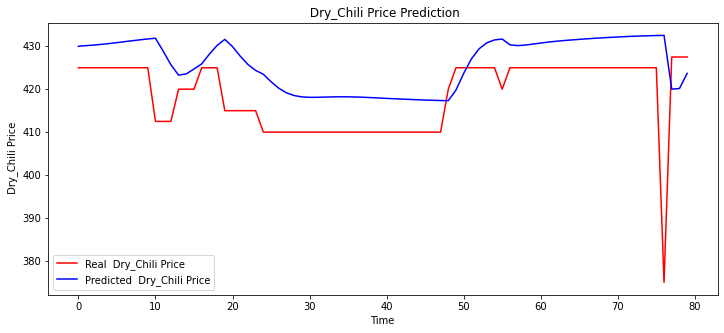

In [154]:
plt.plot(original, color = 'red', label = 'Real  Dry_Chili Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Dry_Chili Price')
plt.title(' Dry_Chili Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Dry_Chili Price')
plt.legend()
plt.show()

In [155]:
mean_absolute_error(original, pred)

8.019350814819338

In [156]:
mean_squared_error(original, pred)

105.51877395488557

In [157]:
rmse(pred, original)

10.272233153257648